In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, concat
sns.set_theme(context='notebook', style='white', font_scale=1.33)

In [3]:
stan_models = ['mb_m1','mb_m2a', 'mb_m2b', 'mb_m3']
sessions = [1,2,3]

data = []
for stan_model in stan_models:
    
    for session in sessions:

        df = read_csv(os.path.join('stan_results','mb',f'{stan_model}_s{session}_ppc.tsv'), sep='\t')
        df['model'] = stan_model
        data.append(df)
        
data = concat(data)

FileNotFoundError: [Errno 2] No such file or directory: 'stan_results/mb/mb_m1_s1_ppc.tsv'

In [ ]:
## Initialize canvas.
g = sns.FacetGrid(data, row='model', row_order=stan_models, col='session', col_order=sessions, aspect=1.25)
order = np.arange(12) + 1
hue_order = ['GW','NGW','GAL','NGAL']

g.map(sns.pointplot, 'exposure', 'choice', 'robot', order=order, hue_order=hue_order, ci=None)
g.map(sns.pointplot, 'exposure', 'Y_hat', 'robot', order=order, hue_order=hue_order, ci=None, linestyles='--')

In [12]:
agg = {'choice':'mean', 'Y_hat':'mean'}
gb = data.groupby(['model','session','subject','robot']).agg(agg).reset_index()

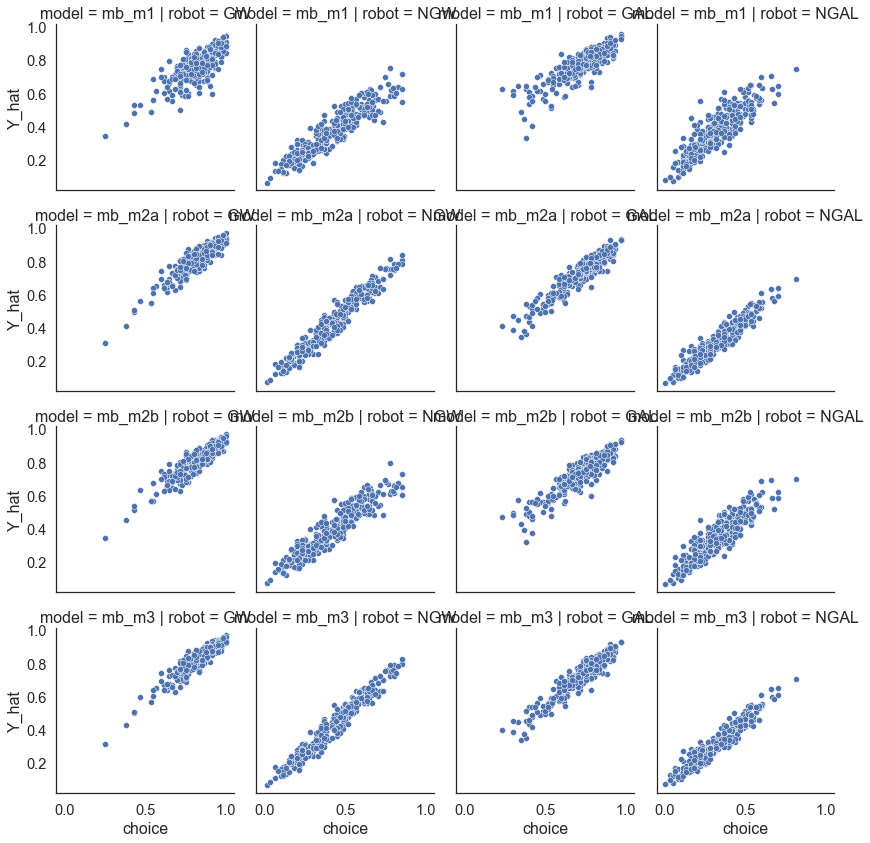

In [13]:
g = sns.FacetGrid(gb, row='model', row_order=stan_models, col='robot', col_order=['GW','NGW','GAL','NGAL'], )
g.map(sns.scatterplot, 'choice', 'Y_hat')

[(-130.0, -100.0)]

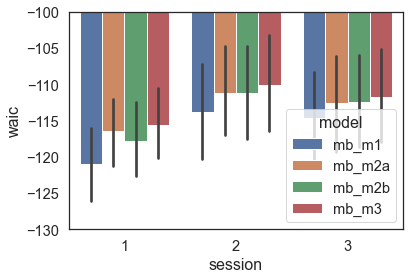

In [4]:
gb = data.groupby(['model','session','subject']).waic.sum().reset_index()

ax = sns.barplot(x='session', y='waic', hue='model', data=gb)
ax.set(ylim=(-130,-100))

[(-130.0, -100.0)]

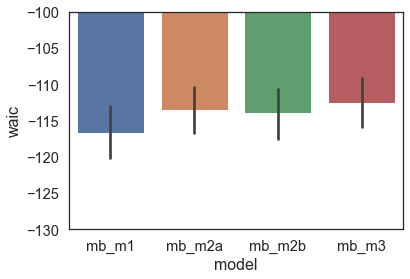

In [5]:
gb = data.groupby(['model','session','subject']).waic.sum().reset_index()

ax = sns.barplot(x='model', y='waic',data=gb)
ax.set(ylim=(-130,-100))